In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gamma

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def SliceSample(log_p, theta, x, bandwidth=1):
    """
    Simple implementation of Slice Sampler
    
    Args:
        log_p (function): reference to the log-function to sample from
        theta (dict): distribution parameters to pass to the log-function
        x (float): sample point
        bandwidth (optional float): initial guess of the slice width
        
    Returns:
        float: sample from the log-distribution
        
    Reference:
        Neal, Radford. Ann. Statist. Volume 31, Number 3 (2003), 705-767.
        http://projecteuclid.org/euclid.aos/1056562461
    """
    # Uniform sample 'vertically' in the range [0,P(x)]
    log_z = log_p(x,theta) - np.random.exponential(1)  
    # Initial slice bounds
    L = x - bandwidth * np.random.rand()
    R = L + bandwidth
    # step the slice out
    while log_p(L,theta) > log_z:
        L -= bandwidth
    while log_p(R,theta) > log_z:
        R += bandwidth
    # Uniform sample 'horizontally' between [L,R]
    xprime = L + (R-L) * np.random.rand()
    while log_p(xprime, theta) < log_z: # reject if sample is outside the slice
        if xprime < x: # narrow the interval
            L = xprime
        else:
            R = xprime
        xprime = L + (R-L) * np.random.rand() # try again
    return xprime

In [3]:
def log_gamma(x, theta):
    """ Log of the gamma distribution PDF """
    alpha = theta['alpha']
    beta  = theta['beta']
    return (alpha - 1) * np.log(x) - beta * x

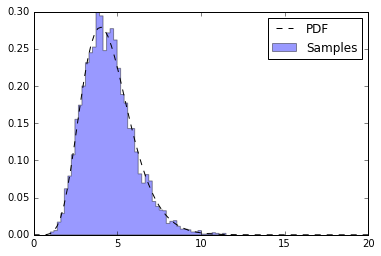

In [4]:
N = 5000
alpha = 9
beta = 2

samples = [1] # initial guess
for _ in range(N): # sample loop
    samples.append( SliceSample(log_gamma, {'alpha':alpha,'beta':beta}, samples[-1]) )
    
X = np.linspace(0,20,100)
plt.hist(samples, bins=50, normed=True, histtype='stepfilled', alpha=0.4, label="Samples")
plt.plot(X, [gamma(alpha,scale=1./beta).pdf(x) for x in X], color='k', ls='--', label="PDF")
plt.legend(loc="best");